<a href="https://colab.research.google.com/github/paulo-santos-ds/Analise-de-vendas/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do projeto

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

##  Descrição dos dados

Name (nome)

Platform (plataforma)

Year_of_Release (Ano de lançamento)

Genre (gênero)

NA_sales (vendas norte-americanas em milhões de USD)

EU_sales (vendas na Europa em milhões de USD)

JP_sales (vendas no Japão em milhões de USD)

Other_sales (vendas em outros países em em milhões de USD)

Critic_Score (Pontuação crítica) (máximo de 100)

User_Score (Pontuação do usuário) (máximo de 10)

Classificação (ESRB)

Os dados de 2016 podem estar incompletos.

# Loja online: Power Games

### importando as bibliotecas

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

### Leitura os dados

In [3]:

df = pd.read_csv('/content/sample_data/games.csv')
df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Informações gerais dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparando os dados

### Transformando nome das colunas em minusculo

In [5]:
df.columns = df.columns.str.lower()
df.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Converta os dados para os tipos necessários


#### A coluna 'year_of_release' deve ser do tipo inteiro (int)

In [6]:
df['year_of_release'] = df['year_of_release'].astype(float)
df['year_of_release'].dtype


dtype('float64')

#### a coluna user_score esta em format tbd convertendo para float

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
df['user_score'].dtype

dtype('float64')

### coluna name com numeros nulos

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df['name'].isna().sum()

2

#### exclusão de linhas nulas ''name''

In [10]:
#retirada das linhas nulas name porque não ha como parametrizalas

In [11]:
df.dropna(subset=['name'], inplace=True)
df['name'].isna().sum()

0

#### exclusão de linhas nulas ''user_score''

In [12]:
df.dropna(subset=['user_score'], inplace=True)
df['user_score'].isna().sum()

0

#### Transformação numero nulos coluna ' Year_of_Release' com mesma plataforma

In [13]:
df['year_of_release'] = df.groupby(['platform'])['year_of_release'].transform(lambda x:x.fillna(x.min()))
df['year_of_release'].isna().sum()

0

#### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [14]:
#NA_sales (vendas norte-americanas em milhões de USD)
vendas_na_sales = df['na_sales'].sum()
vendas_na_sales

2852.44

In [15]:
#EU_sales (vendas na Europa em milhões de USD)
vendas_eu_sales = df['eu_sales'].sum()
vendas_eu_sales

1706.9399999999998

In [16]:
#JP_sales (vendas no Japão em milhões de USD)
vendas_jp_sales = df['jp_sales'].sum()
vendas_jp_sales

448.51

In [17]:
#Other_sales (vendas em outros países em em milhões de USD)
vendas_other_sales = df['other_sales'].sum()
vendas_other_sales


602.5600000000002

## Analise os dados

### Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

In [18]:
jogos_por_ano = df.groupby('year_of_release').size().reset_index(name='count')
# Exibir o resultado
print(jogos_por_ano)

    year_of_release  count
0            1985.0     16
1            1988.0      1
2            1992.0      1
3            1994.0      4
4            1996.0      8
5            1997.0     18
6            1998.0     31
7            1999.0     31
8            2000.0    143
9            2001.0    270
10           2002.0    464
11           2003.0    516
12           2004.0    496
13           2005.0    604
14           2006.0    580
15           2007.0    629
16           2008.0    661
17           2009.0    614
18           2010.0    467
19           2011.0    505
20           2012.0    339
21           2013.0    304
22           2014.0    329
23           2015.0    297
24           2016.0    262


### Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [19]:
# Encontrar o primeiro e último ano de vendas para cada plataforma
anos_vendas = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Calcular a duração de popularidade de cada plataforma
anos_vendas['duracao'] = anos_vendas['max'] - anos_vendas['min']
print(anos_vendas)


   platform     min     max  duracao
0       3DS  2011.0  2016.0      5.0
1        DC  1999.0  2001.0      2.0
2        DS  2004.0  2013.0      9.0
3       GBA  2001.0  2006.0      5.0
4        GC  2001.0  2007.0      6.0
5        PC  1985.0  2016.0     31.0
6        PS  1994.0  2002.0      8.0
7       PS2  2000.0  2011.0     11.0
8       PS3  2006.0  2016.0     10.0
9       PS4  2013.0  2016.0      3.0
10      PSP  2004.0  2013.0      9.0
11      PSV  2011.0  2016.0      5.0
12      Wii  2006.0  2014.0      8.0
13     WiiU  2012.0  2016.0      4.0
14     X360  2005.0  2016.0     11.0
15       XB  2000.0  2008.0      8.0
16     XOne  2013.0  2016.0      3.0


### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

In [20]:
# Verificar o primeiro e o último ano de lançamento de jogos no dataset
primeiro_ano = df['year_of_release'].min()
ultimo_ano = df['year_of_release'].max()

# Exibir o período de dados disponíveis
print(f"Período de dados disponíveis: {primeiro_ano} - {ultimo_ano}")

# Selecionar um período relevante para construir o modelo para 2017
# Por exemplo, podemos pegar dados dos últimos 10 anos antes de 2017
periodo_inicio = 2007
periodo_fim = 2016

# Filtrar o DataFrame para incluir apenas os anos selecionados
df_periodo = df[(df['year_of_release'] >= periodo_inicio) & (df['year_of_release'] <= periodo_fim)]

# Exibir o DataFrame filtrado
print(df_periodo)


Período de dados disponíveis: 1985.0 - 2016.0
                                    name platform  year_of_release      genre  \
2                         Mario Kart Wii      Wii           2008.0     Racing   
3                      Wii Sports Resort      Wii           2009.0     Sports   
8              New Super Mario Bros. Wii      Wii           2009.0   Platform   
13                               Wii Fit      Wii           2007.0     Sports   
14                    Kinect Adventures!     X360           2010.0       Misc   
...                                  ...      ...              ...        ...   
16660                   Prison Architect     XOne           2016.0     Action   
16692  Metal Gear Solid V: Ground Zeroes       PC           2014.0     Action   
16696                             Breach       PC           2011.0    Shooter   
16702            STORM: Frontline Nation       PC           2011.0   Strategy   
16705                            15 Days       PC           200

### Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.

In [21]:
# Filtrar o DataFrame para incluir apenas os anos de 2007 a 2016
df_relevante = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

# Exibir o DataFrame filtrado
print(df_relevante)


                                    name platform  year_of_release  \
42                    Grand Theft Auto V      PS4           2014.0   
77                               FIFA 16      PS4           2015.0   
92        Call of Duty: Advanced Warfare      PS4           2014.0   
94                               FIFA 17      PS4           2016.0   
105                            Fallout 4      PS4           2015.0   
...                                  ...      ...              ...   
16630           Sébastien Loeb Rally Evo     XOne           2016.0   
16643                  Rugby Challenge 3     XOne           2016.0   
16652                   Fast Racing Neo      WiiU           2016.0   
16660                   Prison Architect     XOne           2016.0   
16692  Metal Gear Solid V: Ground Zeroes       PC           2014.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
42           Action      3.96      6.31      0.38         1.97          97.0   

In [22]:
#observando dataset
df_relevante

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M
...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN


In [23]:
#total_vendas em todas as regioes

df_relevante.loc[:, 'global_sales'] = df_relevante[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].fillna(0).sum(axis=1)




<ipython-input-23-603bd0370e19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevante.loc[:, 'global_sales'] = df_relevante[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].fillna(0).sum(axis=1)


### Quais plataformas estão liderando em vendas?

In [24]:
# Calcular as vendas totais por plataforma
vendas_por_plataforma = df_relevante.groupby('platform')['global_sales'].sum().reset_index()

# Ordenar as plataformas pelas vendas totais
vendas_por_plataforma = vendas_por_plataforma.sort_values(by='global_sales', ascending=False)

# Exibir as plataformas com as maiores vendas totais
print(vendas_por_plataforma)


  platform  global_sales
3      PS4        219.85
8     XOne        115.74
2      PS3         48.69
7     X360         40.84
6     WiiU         34.65
0      3DS         26.89
1       PC         24.08
4      PSV         10.80
5      Wii          2.57


### Quais estão crescendo ou diminuindo?

#### Calcular as vendas totais por plataforma

In [25]:
vendas_por_plataforma = df_relevante.groupby('platform')['global_sales'].sum().reset_index()

#### Ordenar as plataformas pelas vendas totais

In [26]:
vendas_por_plataforma = vendas_por_plataforma.sort_values(by='global_sales', ascending=False)

#### Agrupar por ano e plataforma, e somar as vendas globais

In [27]:
vendas_ano_plataforma = df_relevante.groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack().fillna(0)

#### Calcular a taxa de crescimento anual para cada plataforma

In [28]:
taxa_crescimento = vendas_ano_plataforma.pct_change().fillna(0)
print(taxa_crescimento)

platform              3DS        PC       PS3       PS4       PSV  Wii  \
year_of_release                                                          
2014.0           0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
2015.0          -0.162304 -0.373729 -0.691688  0.002594 -0.572700 -1.0   
2016.0          -0.792857 -0.338295 -0.853021 -0.288566 -0.590278  0.0   

platform             WiiU      X360      XOne  
year_of_release                                
2014.0           0.000000  0.000000  0.000000  
2015.0          -0.040000 -0.734844 -0.047993  
2016.0          -0.785807 -0.856799 -0.468659  


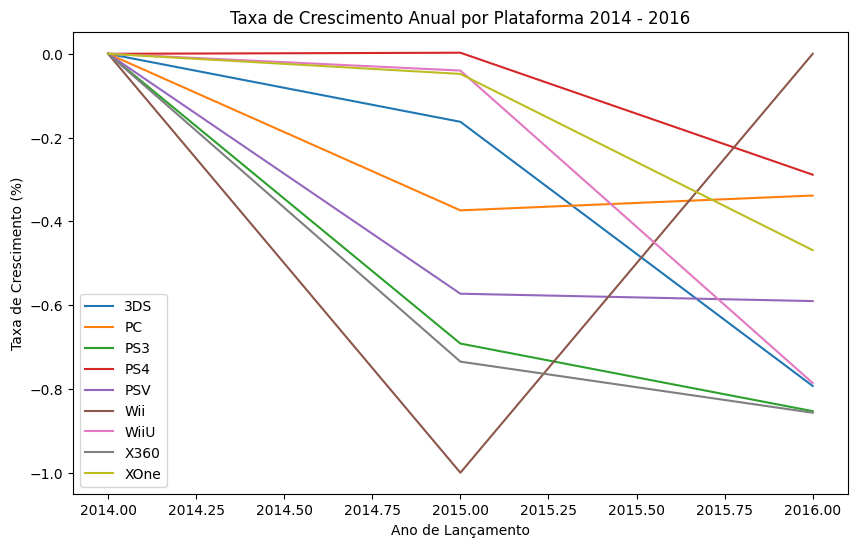

In [29]:
#
# Cria uma figura para o gráfico
plt.figure(figsize=(10, 6))

# Plota um gráfico de linha para cada coluna (plataforma)
for plataforma in taxa_crescimento.columns:
    plt.plot(taxa_crescimento.index, taxa_crescimento[plataforma], label=plataforma)

# Adiciona título e rótulos
plt.title('Taxa de Crescimento Anual por Plataforma 2014 - 2016')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Taxa de Crescimento (%)')

# Adiciona uma legenda
plt.legend(loc='best')

# Mostra o gráfico
plt.show()




```python
# Calcular vendas totais por plataforma
sales_by_platform = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(sales_by_platform)
```

![image.png](attachment:image.png)

#### Selecione várias plataformas potencialmente lucrativas.


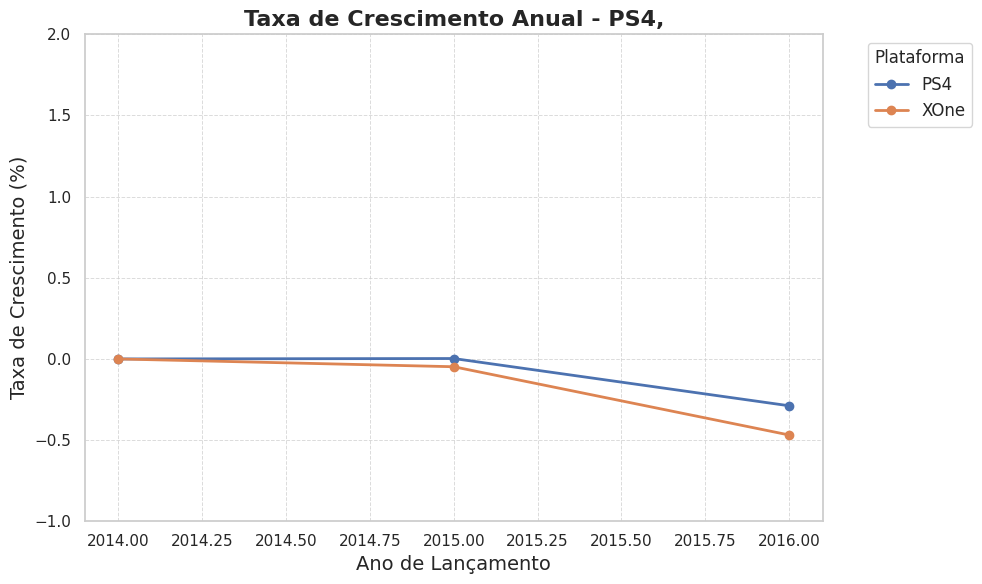

In [30]:

# Lista de plataformas de interesse
plataformas_interesse = ['PS4', 'XOne' ]

# Filtrar apenas as plataformas de interesse
df_plataformas = taxa_crescimento[plataformas_interesse]

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria uma figura com tamanho maior
plt.figure(figsize=(10, 6))

# Plota um gráfico de linha para cada plataforma com melhorias visuais
for plataforma in df_plataformas.columns:
    plt.plot(
        df_plataformas.index,  # Eixo X (anos)
        df_plataformas[plataforma],  # Eixo Y (taxa de crescimento)
        marker='o',  # Adiciona marcadores em cada ponto
        linestyle='-',  # Linha contínua
        label=plataforma,  # Nome da plataforma na legenda
        linewidth=2  # Espessura das linhas
    )

# Adiciona título e rótulos com fontes maiores
plt.title('Taxa de Crescimento Anual - PS4,', fontsize=16, fontweight='bold')
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Taxa de Crescimento (%)', fontsize=14)

# Adiciona uma grade ao fundo
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adiciona uma legenda fora do gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Ajusta os limites do eixo Y (se necessário)
plt.ylim(-1, 2)

# Mostra o gráfico
plt.tight_layout()
plt.show()


#### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma.

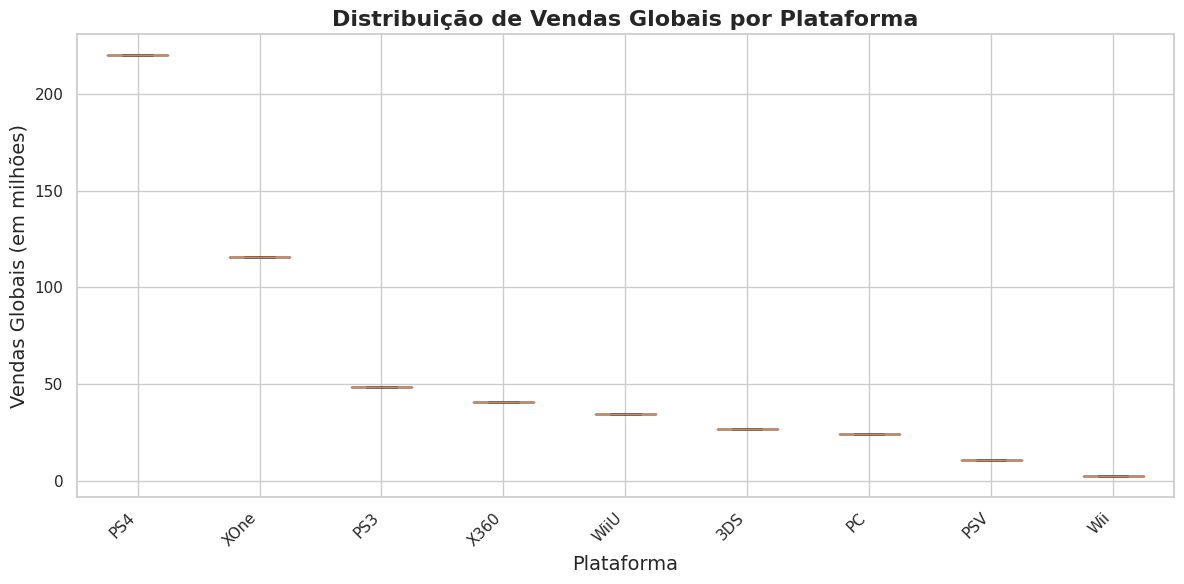

In [31]:

# Criar uma lista única de plataformas
plataformas = vendas_por_plataforma['platform'].unique()

# Para cada plataforma, extrair as vendas globais
vendas_por_plataforma_lista = [vendas_por_plataforma[vendas_por_plataforma['platform'] == plataforma]['global_sales'] for plataforma in plataformas]

# Criar o gráfico de diagrama de caixa (boxplot)
plt.figure(figsize=(12, 6))
plt.boxplot(vendas_por_plataforma_lista, labels=plataformas)


plt.title('Distribuição de Vendas Globais por Plataforma', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas Globais (em milhões)', fontsize=14)

# Ajustar os rótulos do eixo X para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Corrigir para plt.tight_layout() (função completa)
plt.tight_layout()

plt.show()



#### As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas


Vendas Totais:
 platform
3DS      26.89
PC       24.08
PS3      48.69
PS4     219.85
PSV      10.80
Wii       2.57
WiiU     34.65
X360     40.84
XOne    115.74
Name: global_sales, dtype: float64 
Vendas Médias:
 platform
3DS      26.89
PC       24.08
PS3      48.69
PS4     219.85
PSV      10.80
Wii       2.57
WiiU     34.65
X360     40.84
XOne    115.74
Name: global_sales, dtype: float64

Não há dados suficientes para realizar o teste ANOVA.


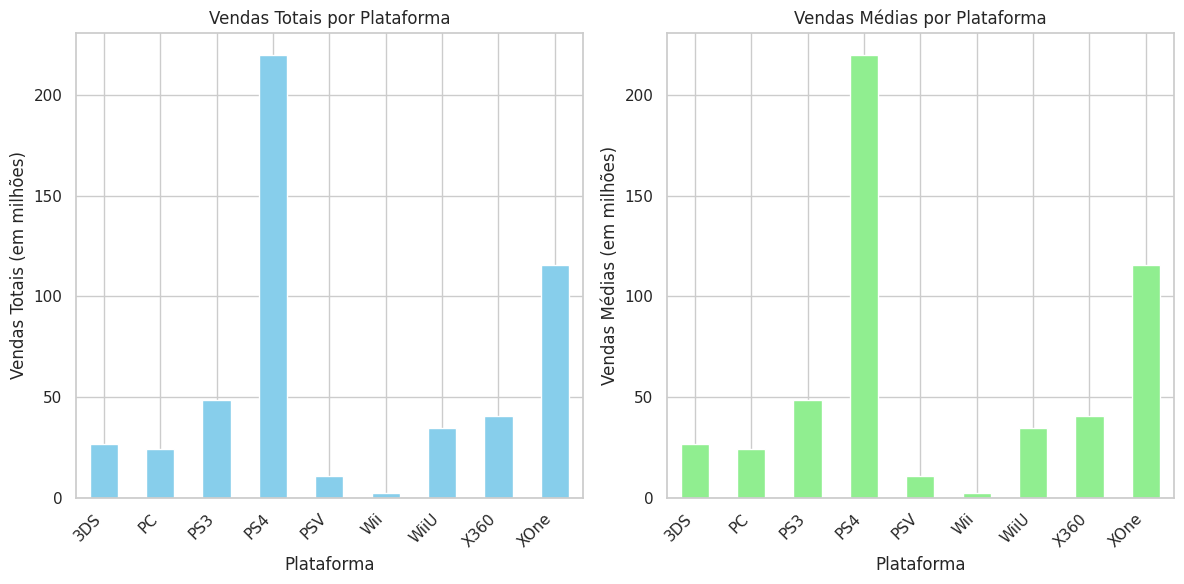

In [32]:
# Filtrar os dados para incluir apenas as plataformas PS3, X360 e Wii
df_ps3 = vendas_por_plataforma[vendas_por_plataforma['platform'] == 'PS3']
df_x360 = vendas_por_plataforma[vendas_por_plataforma['platform'] == 'X360']
df_wii = vendas_por_plataforma[vendas_por_plataforma['platform'] == 'Wii']

# Exclusão dos nulos
df_ps3 = df_ps3.dropna(subset=['global_sales'])
df_x360 = df_x360.dropna(subset=['global_sales'])
df_wii = df_wii.dropna(subset=['global_sales'])

# Calcular vendas totais e médias
vendas_totais = vendas_por_plataforma.groupby('platform')['global_sales'].sum()
vendas_media = vendas_por_plataforma.groupby('platform')['global_sales'].mean()

print("\nVendas Totais:\n", vendas_totais, "\nVendas Médias:\n", vendas_media)

# Teste de Significância
# Verificar se há pelo menos uma plataforma com mais de 1 entrada
contagem_por_plataforma = vendas_por_plataforma['platform'].value_counts()
if (contagem_por_plataforma >= 2).any():
    anova_result = stats.f_oneway(
        *[vendas_por_plataforma[vendas_por_plataforma['platform'] == plataforma]['global_sales']
          for plataforma in vendas_por_plataforma['platform'].unique()
          if contagem_por_plataforma[plataforma] > 1]
    )
    print("\nResultado do teste ANOVA:\n F-statistic:", anova_result.statistic, "p-value:", anova_result.pvalue)
else:
    print("\nNão há dados suficientes para realizar o teste ANOVA.")

# Visualizar os resultados
plt.figure(figsize=(12, 6))

# Gráfico de Vendas Totais
plt.subplot(1, 2, 1)
vendas_totais.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45, ha='right')

# Gráfico de Vendas Médias
plt.subplot(1, 2, 2)
vendas_media.plot(kind='bar', color='lightgreen')
plt.title('Vendas Médias por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Médias (em milhões)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

####  Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (360)

In [33]:

# Filtrar os dados para incluir apenas o Xbox 360
df_xbox360 = df_relevante[df_relevante['platform'] == 'X360']

# Analisar a correlação entre as avaliações e as vendas
correlacao_user = df_xbox360['user_score'].corr(df_xbox360['global_sales'])
correlacao_critic = df_xbox360['critic_score'].corr(df_xbox360['global_sales'])

print(f"Correlação entre avaliações de usuários e vendas: {correlacao_user}")
print(f"Correlação entre avaliações de críticos e vendas: {correlacao_critic}")




Correlação entre avaliações de usuários e vendas: -0.138444570945665
Correlação entre avaliações de críticos e vendas: 0.5257228356581523


#### Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões

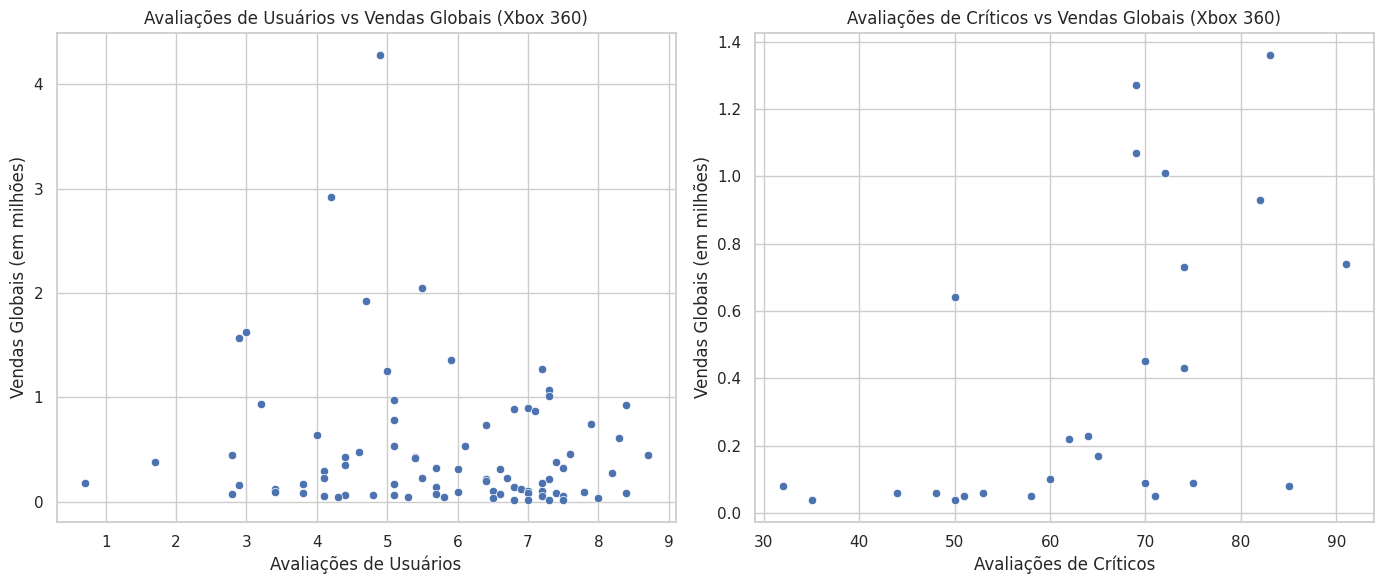

In [34]:
# Visualizar a relação entre as avaliações e as vendas
plt.figure(figsize=(14, 6))

# Gráfico de dispersão para avaliações de usuários
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='global_sales', data=df_xbox360)
plt.title('Avaliações de Usuários vs Vendas Globais (Xbox 360)')
plt.xlabel('Avaliações de Usuários')
plt.ylabel('Vendas Globais (em milhões)')

# Gráfico de dispersão para avaliações de críticos
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='global_sales', data=df_xbox360)
plt.title('Avaliações de Críticos vs Vendas Globais (Xbox 360)')
plt.xlabel('Avaliações de Críticos')
plt.ylabel('Vendas Globais (em milhões)')

plt.tight_layout()
plt.show()

#### Com essas conclusões em mente, compare as vendas em outras plataformas.


           Correlação entre avaliações e vendas para cada plataforma:


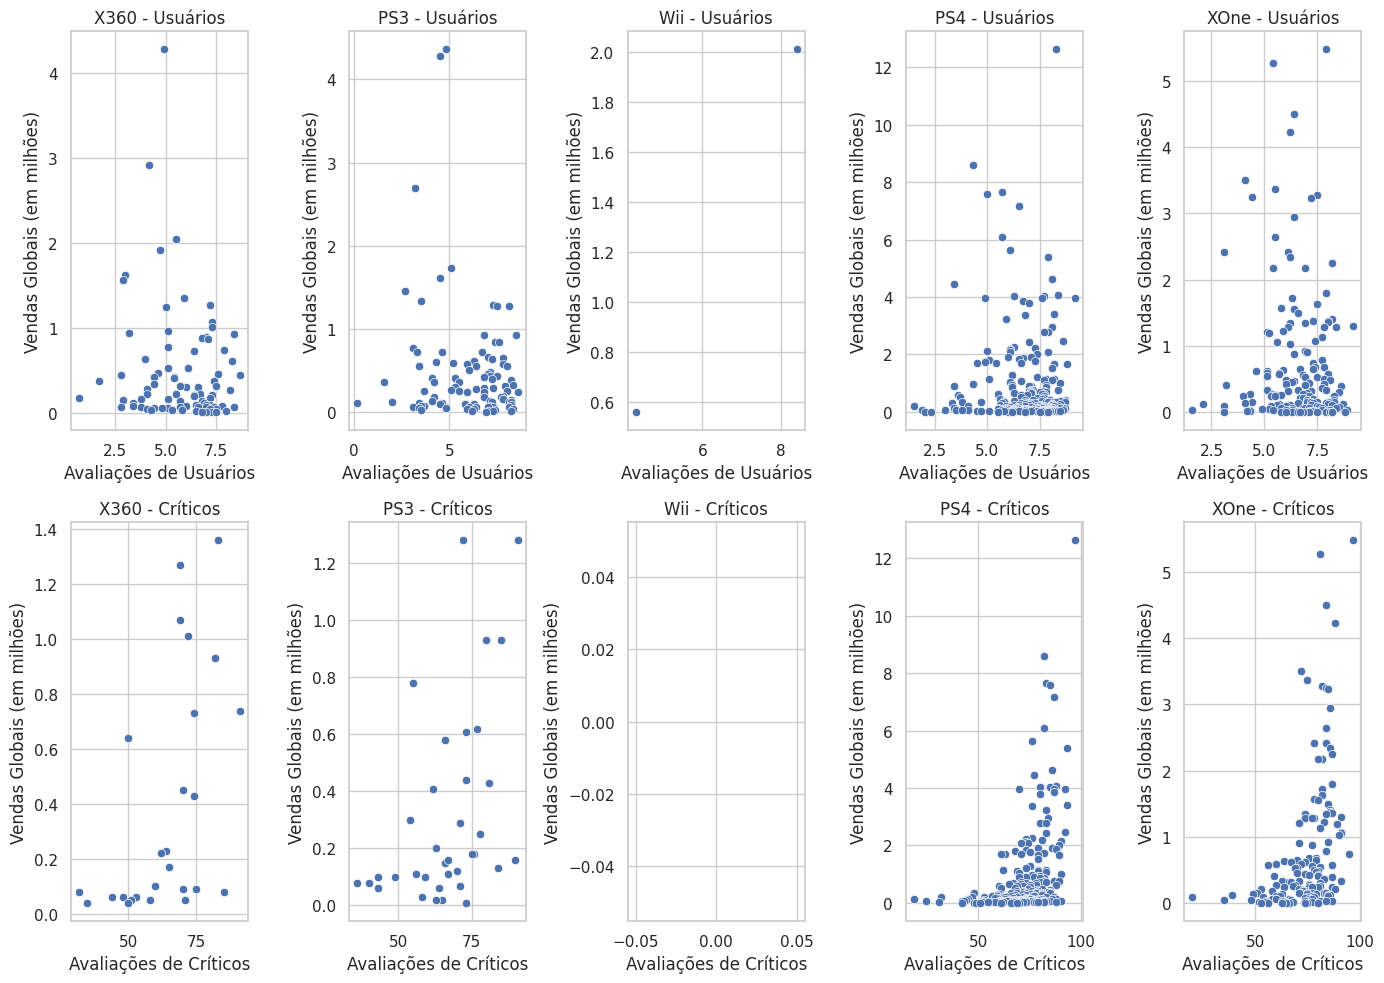

In [35]:

# Filtrar os dados para incluir apenas as plataformas populares
plataformas_populares = ['X360', 'PS3', 'Wii', 'PS4', 'XOne']
df_populares = df_relevante[df_relevante['platform'].isin(plataformas_populares)]

# Analisar a correlação entre as avaliações e as vendas para cada plataforma
correlacoes = {}
for plataforma in plataformas_populares:
    df_plataforma = df_populares[df_populares['platform'] == plataforma]
    correlacao_user = df_plataforma['user_score'].corr(df_plataforma['global_sales'])
    correlacao_critic = df_plataforma['critic_score'].corr(df_plataforma['global_sales'])
    correlacoes[plataforma] = {'user_score': correlacao_user, 'critic_score': correlacao_critic}

print("           Correlação entre avaliações e vendas para cada plataforma:")

# Visualizar a relação entre as avaliações e as vendas para cada plataforma
plt.figure(figsize=(14, 10))

for i, plataforma in enumerate(plataformas_populares, 1):
    df_plataforma = df_populares[df_populares['platform'] == plataforma]

    plt.subplot(2, len(plataformas_populares), i)
    sns.scatterplot(x='user_score', y='global_sales', data=df_plataforma)
    plt.title(f'{plataforma} - Usuários')
    plt.xlabel('Avaliações de Usuários')
    plt.ylabel('Vendas Globais (em milhões)')

    plt.subplot(2, len(plataformas_populares), i + len(plataformas_populares))
    sns.scatterplot(x='critic_score', y='global_sales', data=df_plataforma)
    plt.title(f'{plataforma} - Críticos')
    plt.xlabel('Avaliações de Críticos')
    plt.ylabel('Vendas Globais (em milhões)')

plt.tight_layout()
plt.show()


### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

#### Dê uma olhada na distribuição geral de jogos por gênero

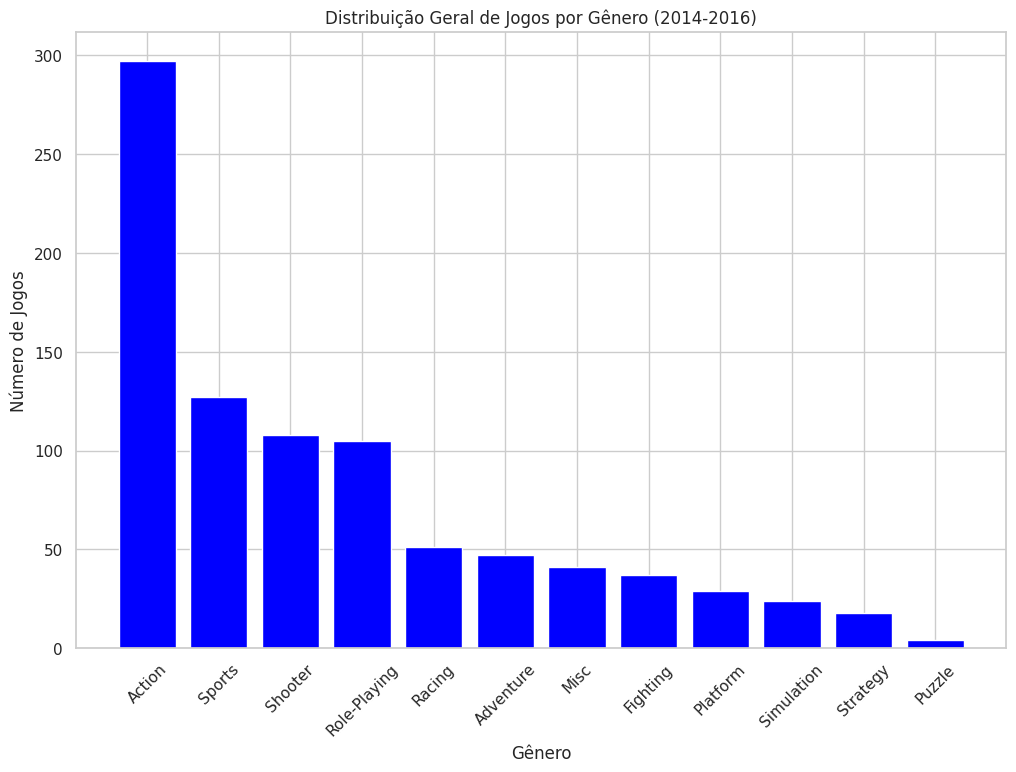

In [36]:

# Contar o número de jogos por gênero
jogos_por_genero = df_relevante['genre'].value_counts().reset_index()
jogos_por_genero.columns = ['genre', 'count']

# Construir o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(jogos_por_genero['genre'], jogos_por_genero['count'], color='blue')
plt.title('Distribuição Geral de Jogos por Gênero (2014-2016)')
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()


#### O que podemos dizer sobre os gêneros mais lucrativos?

##### Gêneros como Ação, Aventura e Esportes provavelmente estarão no topo da lista, refletindo sua popularidade e capacidade de gerar altas vendas globais

## Crie um perfil de usuário para cada região  (AN, UE, JP), determine:

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

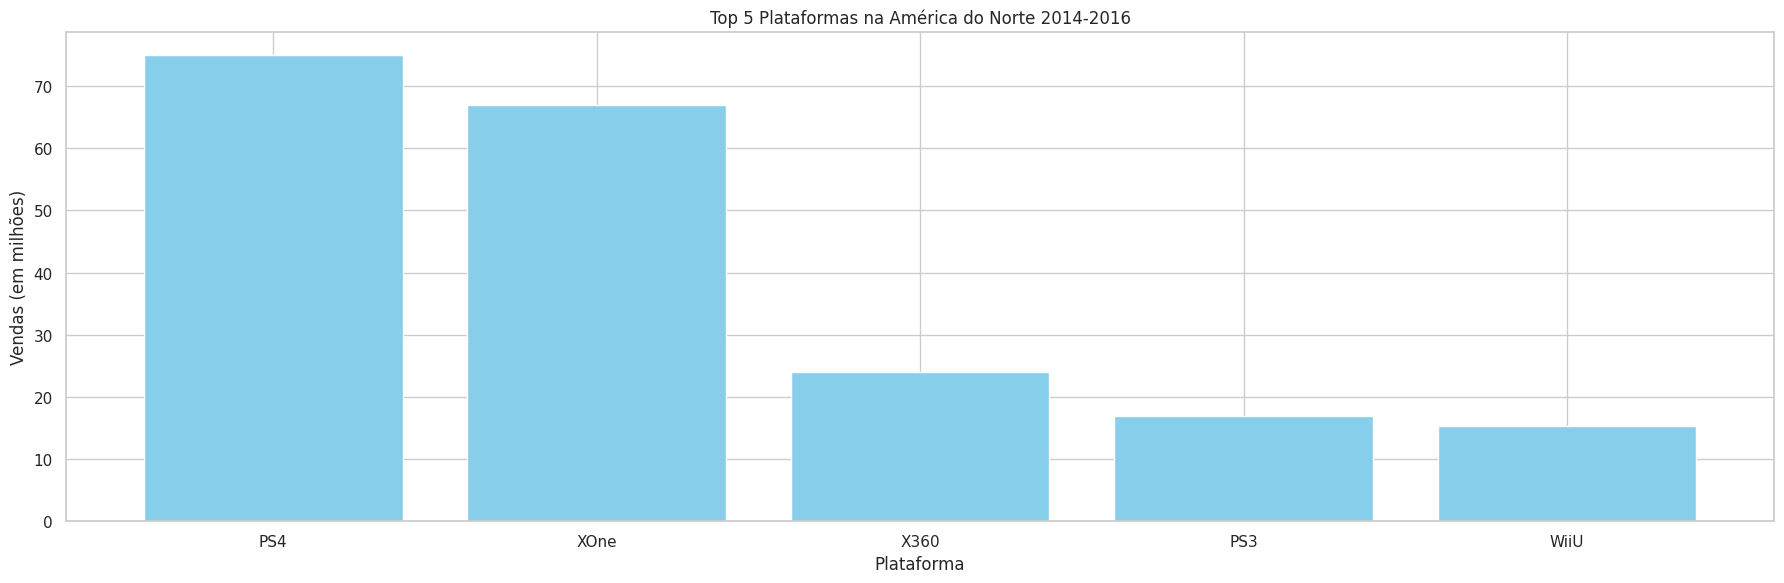

In [37]:

# Calcular as vendas totais por plataforma em cada região
vendas_por_plataforma_regiao = df_relevante.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Selecionar as cinco plataformas com maiores vendas em cada região
top_plataformas_na = vendas_por_plataforma_regiao.nlargest(5, 'na_sales')


# Plotar as vendas por plataforma em cada região
fig, axes = plt.subplots(1, figsize=(18, 6), sharey=True)

# América do Norte
axes.bar(top_plataformas_na['platform'], top_plataformas_na['na_sales'], color='skyblue')
axes.set_title('Top 5 Plataformas na América do Norte 2014-2016')
axes.set_xlabel('Plataforma')
axes.set_ylabel('Vendas (em milhões)')





plt.tight_layout()
plt.show()


#### Variações: Xbox 360 e PS3 dominam, refletindo a popularidade dos consoles de última geração.


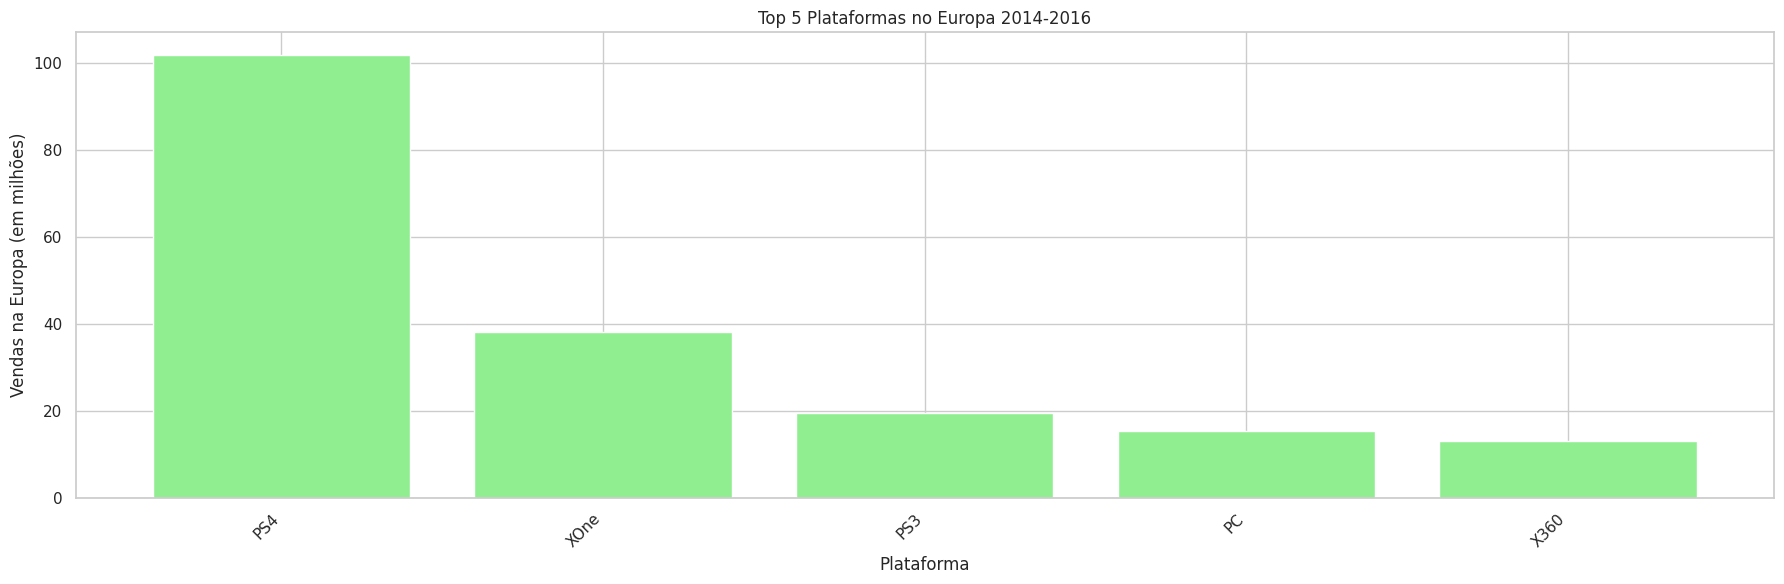

In [38]:

# Obter as 5 plataformas com as maiores vendas na Europa
top_plataformas_jp = vendas_por_plataforma_regiao.nlargest(5, 'eu_sales')

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Plotar as vendas por plataforma na Europa
ax.bar(top_plataformas_jp['platform'], top_plataformas_jp['eu_sales'], color='lightgreen')
ax.set_title('Top 5 Plataformas no Europa 2014-2016')
ax.set_xlabel('Plataforma')
ax.set_ylabel('Vendas na Europa (em milhões)')  # Adicionei um rótulo para o eixo Y

# Melhorar o layout
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Variações: PS3 e Xbox 360 também são populares, mas o PC tem uma presença mais forte em comparação com a América do Norte.

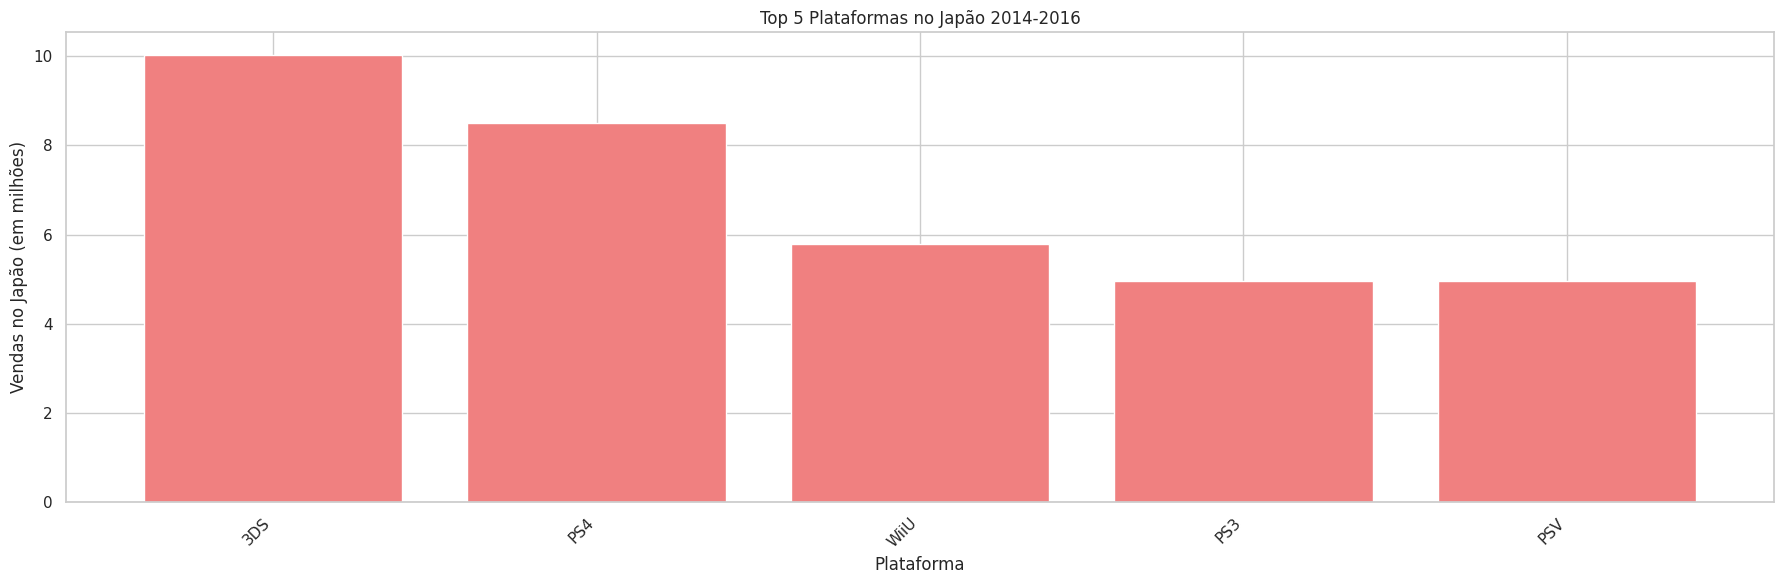

In [39]:

# Obter as 5 plataformas com as maiores vendas no Japão
top_plataformas_jp = vendas_por_plataforma_regiao.nlargest(5, 'jp_sales')

# Criar uma figura e eixos para o gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Plotar as vendas por plataforma no Japão
ax.bar(top_plataformas_jp['platform'], top_plataformas_jp['jp_sales'], color='lightcoral')
ax.set_title('Top 5 Plataformas no Japão 2014-2016')
ax.set_xlabel('Plataforma')
ax.set_ylabel('Vendas no Japão (em milhões)')  # Adicionei um rótulo para o eixo Y

# Melhorar o layout
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo X para melhor legibilidade
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Variações: Consoles portáteis como DS e PSP são extremamente populares, refletindo a preferência por jogos móveis no Japão

### As classificações do ESRB afetam as vendas em regiões individuais?

In [40]:
# E (Everyone)  Adequado para todas as idades. Pode conter violência leve e linguagem mínima.
# E10+ (Everyone 10 and older) Adequado para crianças de 10 anos ou mais. Pode conter mais violência
# T (Teen), M (Mature 17+)  Adequado para adolescentes de 13 anos ou mais.
# M (Mature 17+) Adequado para maiores de 17 anos.
# AO (Adults Only 18+) Adequado apenas para adultos. Pode incluir violência
# RP (Rating Pending)  Aguardando classificação final. Usado em materiais promocionais

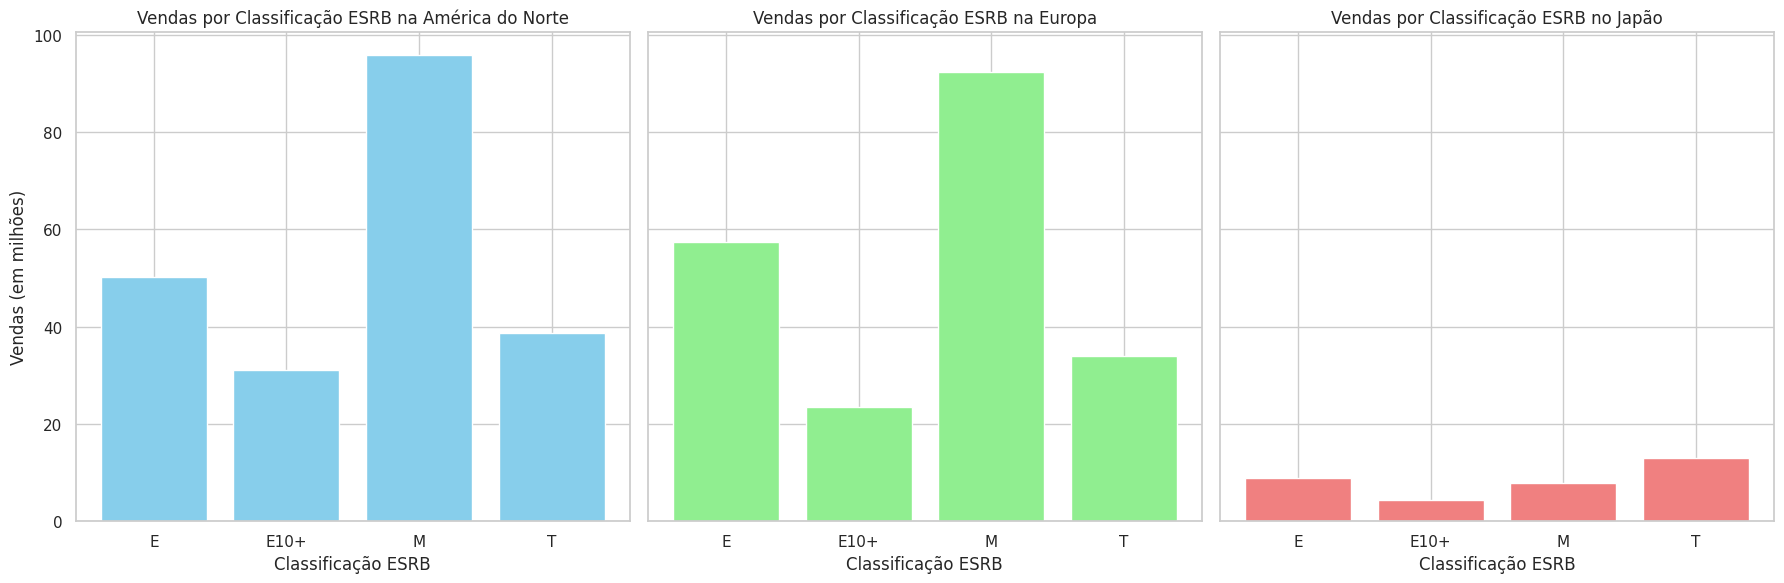

In [41]:

# Supondo que os dados estejam em um DataFrame chamado df_relevante
# Filtrar os dados para incluir apenas as colunas relevantes
df_esrb = df_relevante[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'global_sales', 'rating']]

# Agrupar as vendas por classificação ESRB
vendas_por_classificacao = df_esrb.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'global_sales']].sum().reset_index()

# Plotar as vendas por classificação ESRB em cada região
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# América do Norte
axes[0].bar(vendas_por_classificacao['rating'], vendas_por_classificacao['na_sales'], color='skyblue')
axes[0].set_title('Vendas por Classificação ESRB na América do Norte')
axes[0].set_xlabel('Classificação ESRB')
axes[0].set_ylabel('Vendas (em milhões)')

# Europa
axes[1].bar(vendas_por_classificacao['rating'], vendas_por_classificacao['eu_sales'], color='lightgreen')
axes[1].set_title('Vendas por Classificação ESRB na Europa')
axes[1].set_xlabel('Classificação ESRB')

# Japão
axes[2].bar(vendas_por_classificacao['rating'], vendas_por_classificacao['jp_sales'], color='lightcoral')
axes[2].set_title('Vendas por Classificação ESRB no Japão')
axes[2].set_xlabel('Classificação ESRB')

plt.tight_layout()
plt.show()


#### As classificações do ESRB podem influenciar de acordo com região jogos om classificação "M"  adequado para maiores de 17 anos constrata com publico jovem que gostam de jogos de guerra

## Teste as seguintes hipóteses

###  As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

In [42]:
import pandas as pd

# Supondo que os dados estejam em um DataFrame chamado df_relevante
# Filtrar os dados para incluir apenas as plataformas Xbox One e PC
df_xbox_one = df_relevante[df_relevante['platform'] == 'XOne']
df_pc = df_relevante[df_relevante['platform'] == 'PC']

# Calcular as classificações médias dos usuários para cada plataforma
media_user_xbox_one = df_xbox_one['user_score'].mean()
media_user_pc = df_pc['user_score'].mean()

print(f"Classificação média dos usuários para Xbox One: {media_user_xbox_one}")
print(f"Classificação média dos usuários para PC: {media_user_pc}")

print("\n")

# Verificar se as classificações médias são as mesmas
if media_user_xbox_one == media_user_pc:
    print("As classificações médias dos usuários para Xbox One e PC são as mesmas.")
else:
    print("As classificações médias dos usuários para Xbox One e PC são diferentes.")


Classificação média dos usuários para Xbox One: 6.594545454545456
Classificação média dos usuários para PC: 6.298360655737705


As classificações médias dos usuários para Xbox One e PC são diferentes.


### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [43]:
# Filtrar os dados para incluir apenas os gêneros Action e Sports
df_action = df_relevante[df_relevante['genre'] == 'Action']
df_sports = df_relevante[df_relevante['genre'] == 'Sports']

# Exclusão dos nulos
df_action = df_action.dropna(subset=['user_score'])
df_sports = df_sports.dropna(subset=['user_score'])

# Calcular as classificações médias dos usuários para cada gênero
media_user_action = df_action['user_score'].mean()
media_user_sports = df_sports['user_score'].mean()

print(f"Classificação média dos usuários para Action: {media_user_action}")
print(f"Classificação média dos usuários para Sports: {media_user_sports}")

print("\n")

# Verificar se as classificações médias são diferentes
if media_user_action != media_user_sports:
    print("As classificações médias dos usuários para Action e Sports são diferentes.")
else:
    print("As classificações médias dos usuários para Action e Sports são as mesmas.")


Classificação média dos usuários para Action: 6.760606060606061
Classificação média dos usuários para Sports: 5.2251968503937


As classificações médias dos usuários para Action e Sports são diferentes.


### Defina o valor do limiar alfa você mesmo.

#### liminar alfa = 0,05 ou 5%

### Como você formula as hipóteses alternativas e nulas

In [ ]:
user_scores_action.head()

In [46]:

user_scores_action = df_action['user_score']
user_scores_sports = df_sports['user_score']

# Definir o valor do limiar alfa
alpha = 0.005

# Realizar o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(user_scores_action, user_scores_sports)

print(f"Valor de p: {p_value}")

# Comparar o valor de p com o limiar alfa
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As classificações médias dos usuários para Action e Sports são diferentes.")
else:
    print("Não rejeitamos a hipótese nula. As classificações médias dos usuários para Action e Sports são as mesmas.")


Valor de p: 2.871114798510586e-19
Rejeitamos a hipótese nula. As classificações médias dos usuários para Action e Sports são diferentes.


### Quais critérios você usou para testar as hipóteses, e por quê

#### Indica a probabilidade de obter os resultados observados, ou mais extremos, se a hipótese nula for verdadeira. Um valor-p menor que α indica que rejeitamos a hipótese nula

####  Se o valor-p for menor que α, rejeitamos a hipótese nula e aceitamos a hipótese alternativa.

##  Escreva uma conclusão geral

### Projeto completo, apresentando o desafio de realizar uma análise de dados que se aproxima da realidade de uma empresa. O objetivo é avaliar a relevância dos produtos vendidos no mercado e, a partir dessa análise, maximizar os lucros. Com essa abordagem, conseguimos identificar oportunidades e estratégias para otimizar o desempenho comercial."

